<a href="https://colab.research.google.com/github/Moly-malibu/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

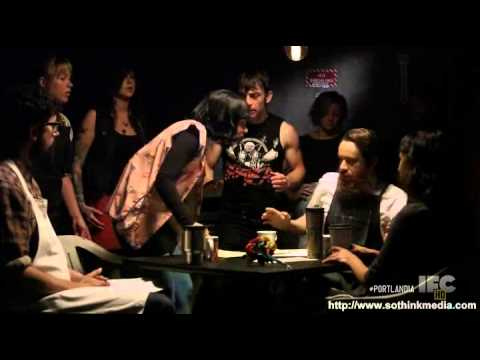

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/content'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


# find the attributes of the best & worst coffee shops in the dataset

In [0]:
import seaborn as sns
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [6]:
df.columns

Index(['coffee_shop_name', 'full_review_text', 'star_rating'], dtype='object')

In [7]:
df['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [8]:
df['coffee_shop_name'].value_counts(normalize=True)

Epoch Coffee                            0.052521
Halcyon                                 0.039391
The Factory - Cafe With a Soul          0.032038
Venezia Italian Gelato                  0.026261
Houndstooth Coffee                      0.026261
                                          ...   
Lucky Lab Coffee                        0.003283
Sister Coffee                           0.002232
Kowabunga Coffee                        0.002101
The Marvelous Vintage Tea Party Co.     0.001313
Lola Savannah Coffee Downtown           0.000525
Name: coffee_shop_name, Length: 79, dtype: float64

In [0]:
# Processing Raw Text with Spacy

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
#create new DF to conserved the original data
df = df.copy()

# renames columns for ease of use later
df.columns=['shop', 'text', 'rating']

# changes rating column to have only the number (still as a string)
df['rating'] = df['rating'].str[1:4]

#Convertsa number string to flat and int
df['rating'] = df['rating'].astype(float)
df['rating'] = df['rating'].astype(int)

#Create date column (full reviwe text - date)
df['date'] = df['text'].str.split(' ').apply(lambda x: x[1])

#Data column pass to datetime
df['date'] = df['date'].apply(pd.to_datetime)

#Tokenizer 
df['counter'] = df['text'].apply(tokenizer)

#Token past the date token
df['counter'] = df['text'].apply(lambda x: x[2: ])

#Past the date token
df['counter'] = df['counter']. apply(Counter)

In [11]:
df.head()

,shop,text,rating,date,counter
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,2016-11-25,"{'1': 3, '/': 2, '2': 2, '5': 1, '0': 1, '6': ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,2016-12-02,"{'2': 3, '/': 2, '0': 1, '1': 1, '6': 1, ' ': ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,2016-11-30,"{'1': 3, '/': 2, '3': 1, '0': 2, '2': 1, '6': ..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,2016-11-25,"{'1': 3, '/': 2, '2': 2, '5': 2, '0': 2, '6': ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,2016-12-03,"{'2': 2, '/': 2, '3': 1, '0': 1, '1': 2, '6': ..."


In [0]:
#CLEAN DATA
#remove whitespace
df['shop'] = df['shop'].str.strip().str.lower()
df['text'] = df['text'].str.strip().str.lower()

#Start with date
df['text'].str.match('\d?\d/\d?\d/\d{4}').all()

df['text'] = df['text'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [13]:
#Overall Word / Token Count
howmanywords = df['counter'].sum()

howmanywords.most_common(7)

#View Counts by Rating
#  'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. 
#  'good' coffee shop is a 4 or 5.

bad = df[df['rating'] <= 3 ]
good = df[df['rating'] >= 4 ]

#assert len(df) == len(bad) + len(good)

#reviews score
wordsbad = bad['counter'].sum()
wordsgood = good['counter'].sum()

#Good Review
wordsgood.most_common(7)

#Bad Review 
wordsbad.most_common(7)

[(' ', 184702),
 ('e', 94702),
 ('t', 68652),
 ('a', 59363),
 ('o', 58402),
 ('i', 46617),
 ('n', 45174)]

In [14]:
good['rating'].value_counts(normalize=True)[:10]

5    0.615635
4    0.384365
Name: rating, dtype: float64

In [15]:
bad['rating'].value_counts(normalize=True)[:10]

3    0.500000
2    0.311653
1    0.188347
Name: rating, dtype: float64

#Token

In [16]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

lemmas = []

for doc in nlp.pipe(df['text'], batch_size=500):
     
    lems = []

    for token in doc:
          if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lems.append(token.lemma_)

    lemmas.append(lems)

assert len(lemmas) ==  df.shape[0]

df['lemmas'] = lemmas
df.head()

,shop,text,rating,date,counter,lemmas
0,the factory - cafe with a soul,checkin love love loved the atmosphere every ...,5,2016-11-25,"{'1': 3, '/': 2, '2': 2, '5': 1, '0': 1, '6': ...","[ , checkin, love, love, love, atmosphere, cor..."
1,the factory - cafe with a soul,listed in date night austin ambiance in austi...,4,2016-12-02,"{'2': 3, '/': 2, '0': 1, '1': 1, '6': 1, ' ': ...","[ , list, date, night, austin, ambiance, austi..."
2,the factory - cafe with a soul,checkin listed in brunch spots i loved the ec...,4,2016-11-30,"{'1': 3, '/': 2, '3': 1, '0': 2, '2': 1, '6': ...","[ , checkin, list, brunch, spot, love, eclecti..."
3,the factory - cafe with a soul,very cool decor good drinks nice seating howe...,2,2016-11-25,"{'1': 3, '/': 2, '2': 2, '5': 2, '0': 2, '6': ...","[ , cool, decor, good, drink, nice, seating, o..."
4,the factory - cafe with a soul,checkin they are located within the northcros...,4,2016-12-03,"{'2': 2, '/': 2, '3': 1, '0': 1, '1': 2, '6': ...","[ , checkin, locate, northcross, mall, shoppin..."


In [17]:
df['rating'].value_counts() 

5    3780
4    2360
3     738
2     460
1     278
Name: rating, dtype: int64

In [18]:
df['rating'].value_counts(normalize=True)[:50]

5    0.496324
4    0.309874
3    0.096901
2    0.060399
1    0.036502
Name: rating, dtype: float64

In [0]:
from collections import Counter

def count(docs):

    wordsCounts = Counter()
    appearIn = Counter()

    TotalDoc = len(docs)

    for doc in docs:
        wordsCounts.update(doc)
        appearIn.update(set(doc))
    temp = zip(wordsCounts.keys(), wordsCounts.values())

    wc = pd.DataFrame(temp, columns= ['word', 'count'])
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['ptg_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cum_ptg_total'] = wc['ptg_total'].cumsum()

    total = zip(appearIn.keys(), appearIn.values())
    accumul = pd.DataFrame(total, columns=['word', 'appearIn'])
    wc = accumul.merge(wc, on='word')

    wc['appearIn_ptg'] = wc['appearIn'].apply(lambda x: x / TotalDoc)

    return wc.sort_values(by='rank')

In [20]:
wc = count(df['lemmas'])
wc.head(10)

,word,appearIn,count,rank,ptg_total,cum_ptg_total,appearIn_ptg
0,coffee,4924,10586,1.0,0.028815,0.028815,0.646534
23,,7616,7616,2.0,0.020731,0.049546,1.000000
93,place,3888,6044,3.0,0.016452,0.065997,0.510504
147,good,3566,5336,4.0,0.014525,0.080522,0.468225
59,not,3055,5175,5.0,0.014086,0.094608,0.401129
80,great,2853,3946,6.0,0.010741,0.105349,0.374606
153,like,2260,3350,7.0,0.009119,0.114468,0.296744
18,checkin,2969,2985,8.0,0.008125,0.122593,0.389837
399,come,1934,2635,9.0,0.007172,0.129766,0.253939
12,love,1819,2375,10.0,0.006465,0.136230,0.238839


In [0]:
df['good'] = df['rating'] >= 4 
df['bad'] = df['rating'] <= 3 

In [22]:
df.head()

,shop,text,rating,date,counter,lemmas,good,bad
0,the factory - cafe with a soul,checkin love love loved the atmosphere every ...,5,2016-11-25,"{'1': 3, '/': 2, '2': 2, '5': 1, '0': 1, '6': ...","[ , checkin, love, love, love, atmosphere, cor...",True,False
1,the factory - cafe with a soul,listed in date night austin ambiance in austi...,4,2016-12-02,"{'2': 3, '/': 2, '0': 1, '1': 1, '6': 1, ' ': ...","[ , list, date, night, austin, ambiance, austi...",True,False
2,the factory - cafe with a soul,checkin listed in brunch spots i loved the ec...,4,2016-11-30,"{'1': 3, '/': 2, '3': 1, '0': 2, '2': 1, '6': ...","[ , checkin, list, brunch, spot, love, eclecti...",True,False
3,the factory - cafe with a soul,very cool decor good drinks nice seating howe...,2,2016-11-25,"{'1': 3, '/': 2, '2': 2, '5': 2, '0': 2, '6': ...","[ , cool, decor, good, drink, nice, seating, o...",False,True
4,the factory - cafe with a soul,checkin they are located within the northcros...,4,2016-12-03,"{'2': 2, '/': 2, '3': 1, '0': 1, '1': 2, '6': ...","[ , checkin, locate, northcross, mall, shoppin...",True,False


In [0]:
#reviews score
wordsbad = count(df[~df['good']]['lemmas'])
wordsgood = count(df[df['good']]['lemmas'])

In [24]:
wordsbad.head()

,word,appearIn,count,rank,ptg_total,cum_ptg_total,appearIn_ptg
4,coffee,948,2171,1.0,0.026958,0.026958,0.642276
42,not,868,1706,2.0,0.021184,0.048142,0.588076
26,,1476,1476,3.0,0.018328,0.066470,1.000000
24,place,755,1228,4.0,0.015249,0.081719,0.511518
15,good,645,995,5.0,0.012355,0.094074,0.436992


In [25]:
wordsgood.head()

,word,appearIn,count,rank,ptg_total,cum_ptg_total,appearIn_ptg
0,coffee,3976,8415,1.0,0.029336,0.029336,0.647557
23,,6140,6140,2.0,0.021405,0.050742,1.000000
93,place,3133,4816,3.0,0.016789,0.067531,0.510261
175,good,2921,4341,4.0,0.015134,0.082665,0.475733
80,great,2505,3474,5.0,0.012111,0.094776,0.407980


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [26]:
!pip install squarify

In [0]:
import squarify
import matplotlib.pyplot as plt

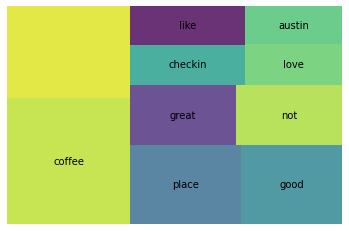

In [31]:
Goodbad = wordsgood[wordsgood['word'].isin(wordsbad['word'])]

GB_top10 = Goodbad[:10]

squarify.plot(sizes=GB_top10['ptg_total'], label=GB_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

